In [1]:
# ### Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
from sklearn.linear_model import LinearRegression
# Lasso
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesRegressor
# Ridge
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# DecisionTree
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
# RandomForestRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

In [4]:
# # Explore DataSets

In [5]:
df1 = pd.read_csv("data/train.csv")
# Size Of Dataset
df1.shape

(10683, 11)

In [6]:
df1.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
df1.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [8]:
# **Missing Values**

In [9]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
df1.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [12]:
# ### Data Analysis And Visualization on train.csv

In [13]:
df1["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [14]:
for i in df1:
    print(f"Number of unique {i}s -->> {df1[i].nunique()}")

Number of unique Airlines -->> 12
Number of unique Date_of_Journeys -->> 44
Number of unique Sources -->> 5
Number of unique Destinations -->> 6
Number of unique Routes -->> 128
Number of unique Dep_Times -->> 222
Number of unique Arrival_Times -->> 1343
Number of unique Durations -->> 368
Number of unique Total_Stopss -->> 5
Number of unique Additional_Infos -->> 10
Number of unique Prices -->> 1870


In [15]:
for i in df1:
    print(df1[i].value_counts())

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
Date_of_Journey
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    

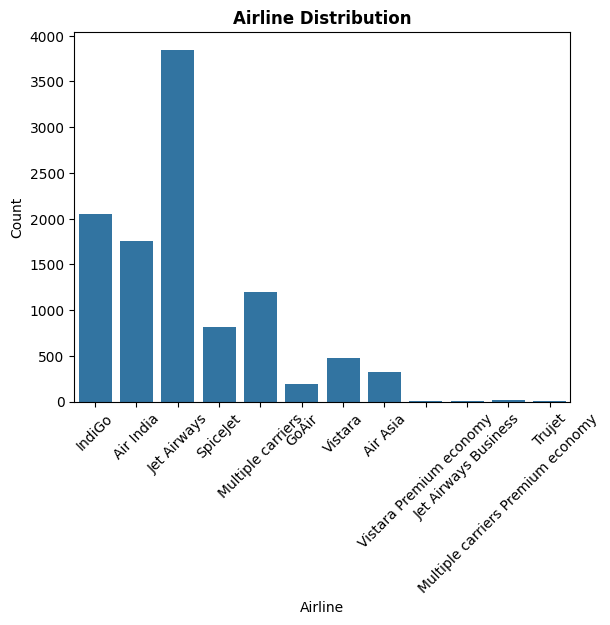

In [16]:
sns.countplot(x="Airline", data=df1)

plt.title("Airline Distribution", fontweight="bold")
plt.xlabel("Airline")
plt.ylabel("Count")

plt.xticks(rotation=45)
plt.show()

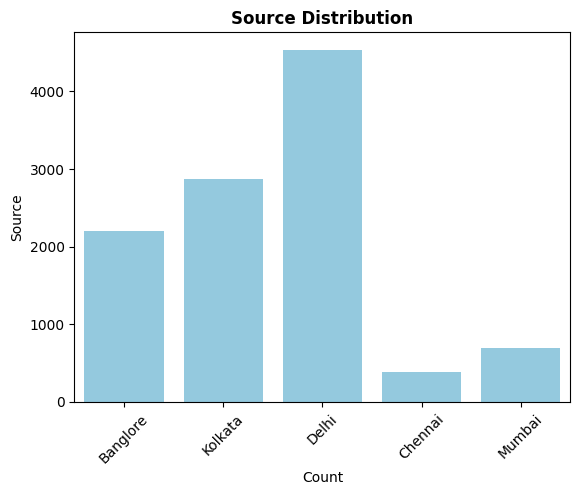

In [17]:
sns.countplot(x="Source", data=df1, color="skyblue")

plt.title("Source Distribution", fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Source")
plt.xticks(rotation=45)

plt.show()

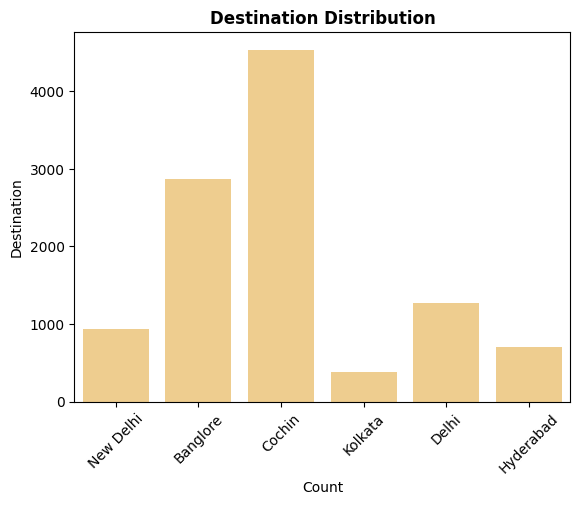

In [18]:
sns.countplot(x=df1["Destination"], color="orange", alpha=0.5)

plt.title("Destination Distribution", fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Destination")
plt.xticks(rotation=45)
plt.show()

In [19]:
top_routes = df1["Route"].value_counts().sort_values(ascending=False)[:10]
top_routes

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
CCU → DEL → BLR           565
BLR → BOM → DEL           402
MAA → CCU                 381
DEL → HYD → COK           326
DEL → JAI → BOM → COK     240
Name: count, dtype: int64

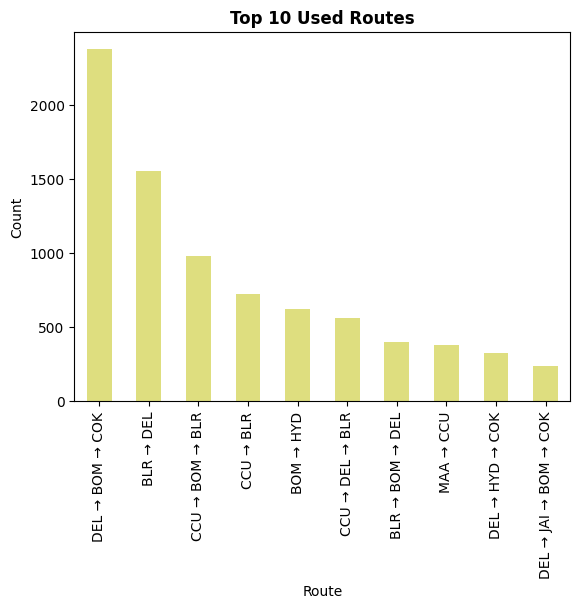

In [20]:
top_routes.plot(kind="bar", color="y", alpha=0.5)

plt.title("Top 10 Used Routes", fontweight="bold")
plt.ylabel("Count")

plt.show()

In [21]:
# Less used routes
bottom_routes = df1["Route"].value_counts().sort_values(ascending=True)[:10]
bottom_routes

Route
BOM → BBI → HYD                      1
BOM → RPR → VTZ → HYD                1
BLR → CCU → BBI → HYD → VGA → DEL    1
BLR → BOM → IXC → DEL                1
BLR → HBX → BOM → NAG → DEL          1
BOM → VNS → DEL → HYD                1
BOM → JAI → DEL → HYD                1
CCU → IXB → DEL → BLR                1
BOM → GOI → HYD                      1
BOM → DED → DEL → HYD                1
Name: count, dtype: int64

In [22]:
df1["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

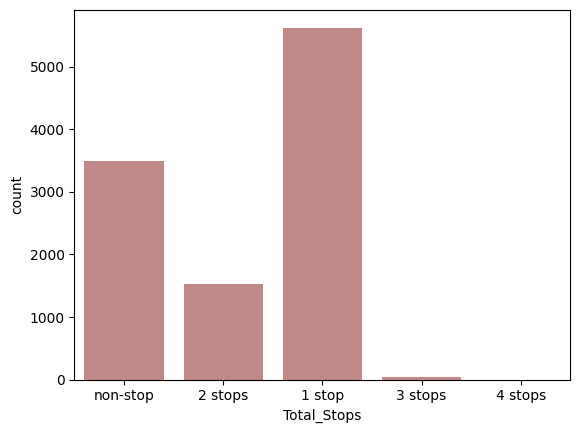

In [23]:
sns.countplot(x=df1["Total_Stops"], color="brown", alpha=0.6)
plt.show()

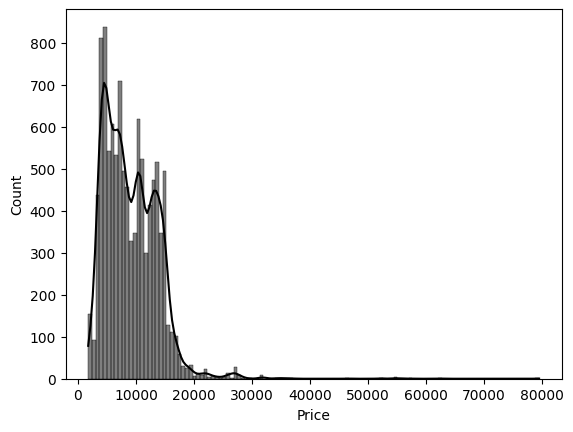

In [24]:
sns.histplot(x=df1["Price"], kde=True, color="black")

plt.show()

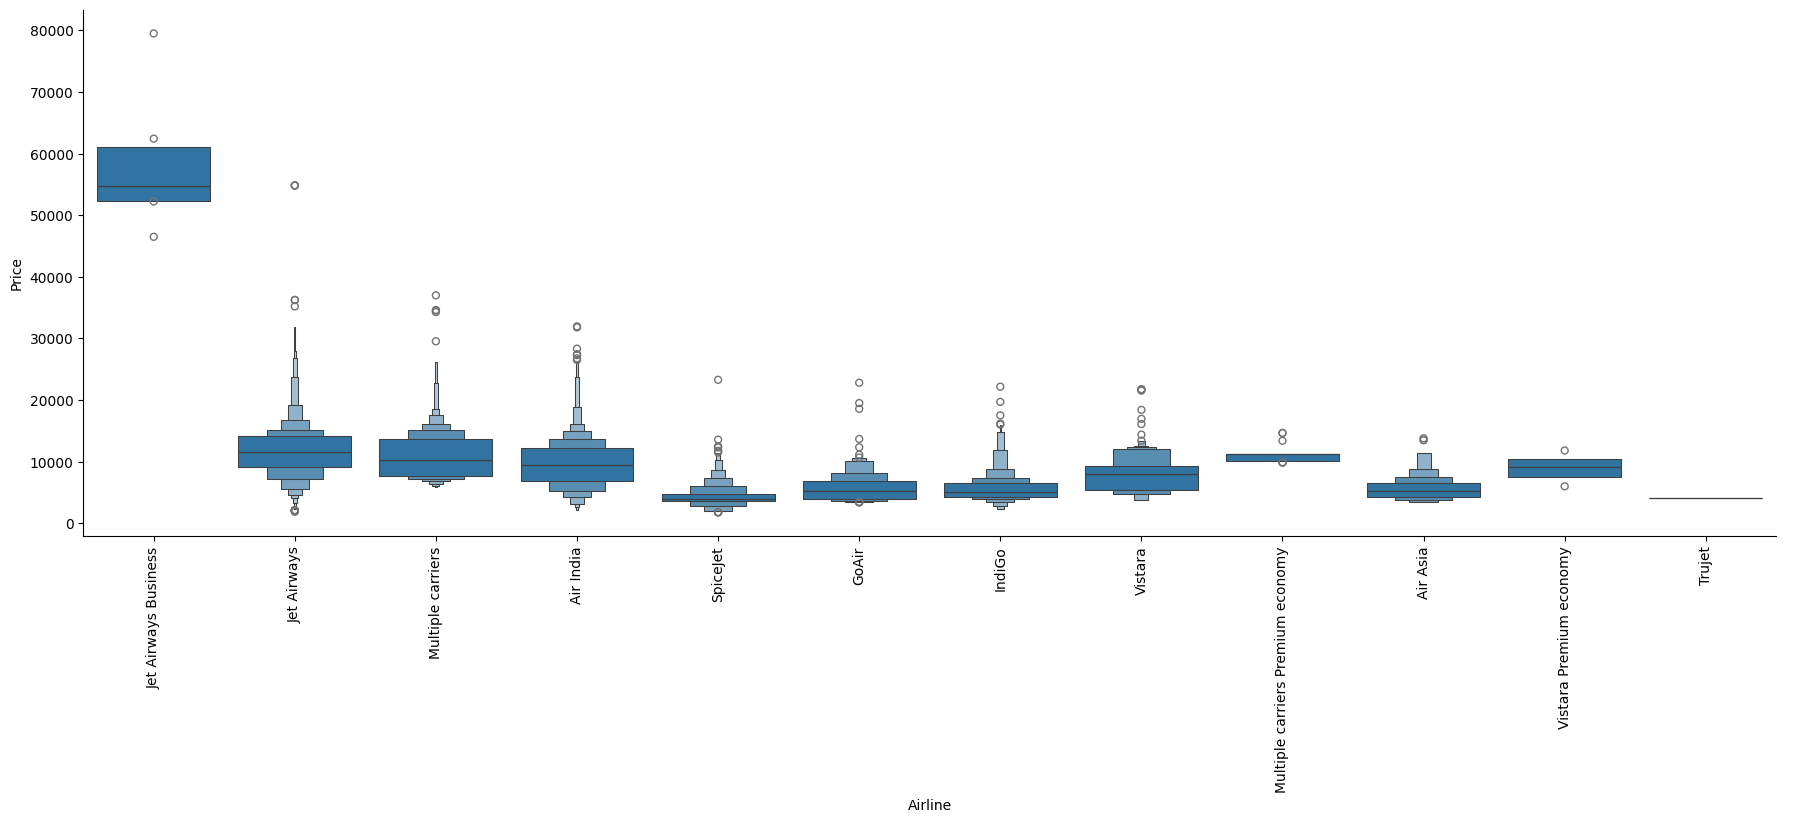

In [25]:
sns.catplot(x="Airline", y="Price", data=df1.sort_values("Price", ascending=False), kind="boxen", height=6, aspect=3)

plt.xticks(rotation=90)

plt.show()

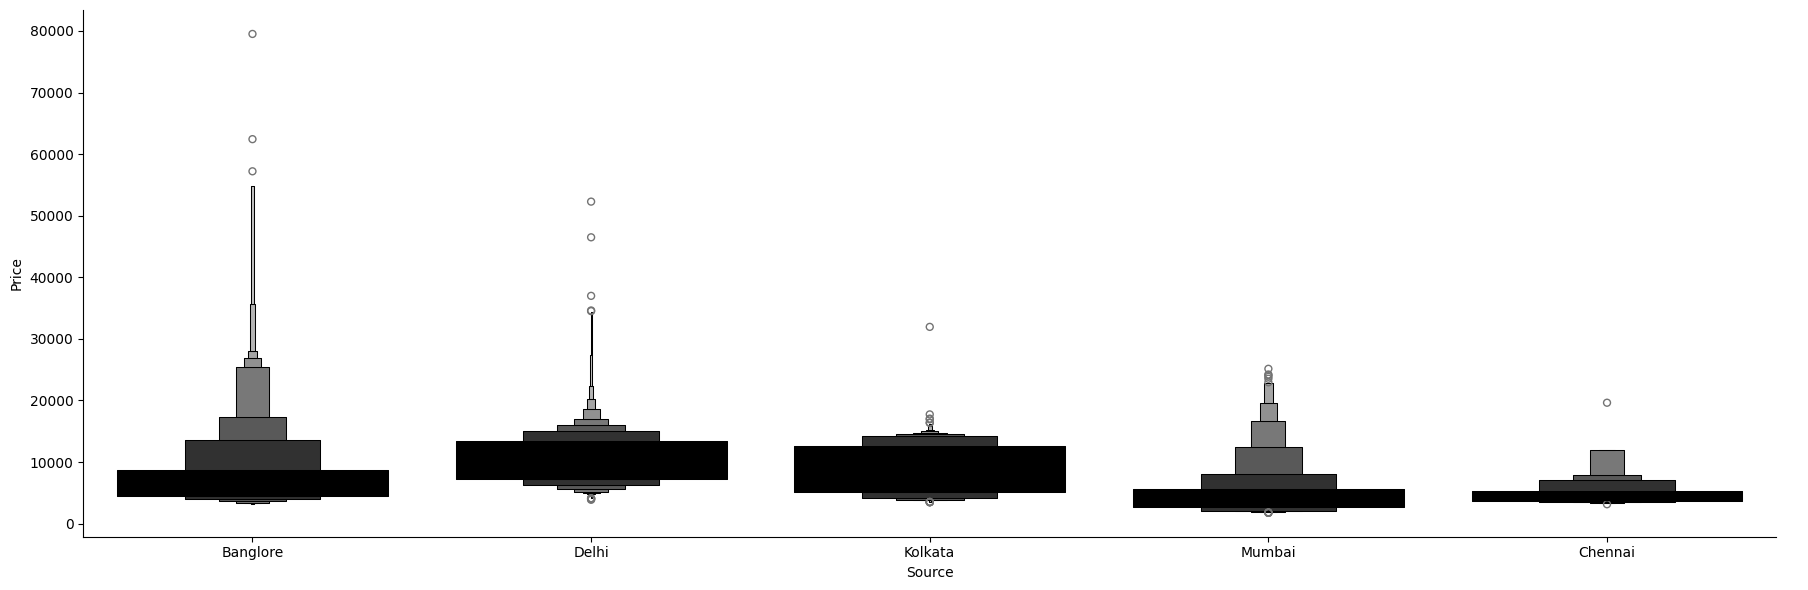

In [26]:
sns.catplot(x="Source", y="Price", data=df1.sort_values("Price", ascending=False), kind="boxen", color="black", height=6, aspect=3)

plt.show()

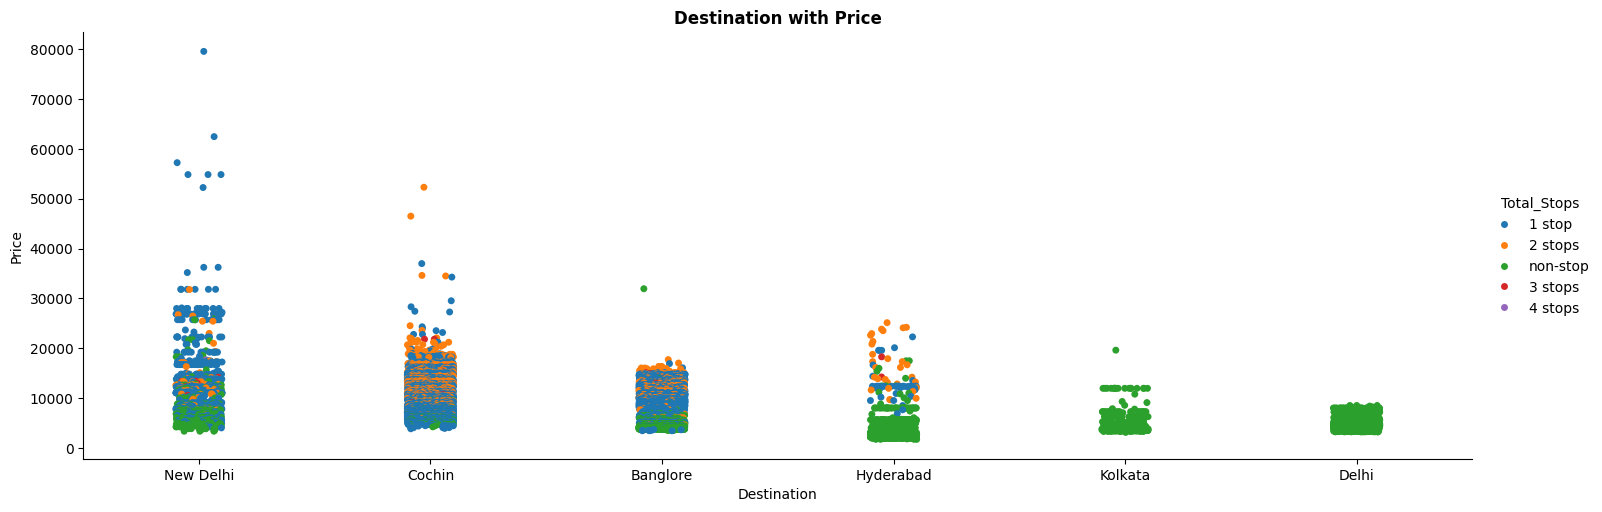

In [27]:
sns.catplot(x="Destination", y="Price", data=df1.sort_values("Price", ascending=False), hue="Total_Stops", aspect=3)

plt.title("Destination with Price", fontweight="bold")

plt.show()

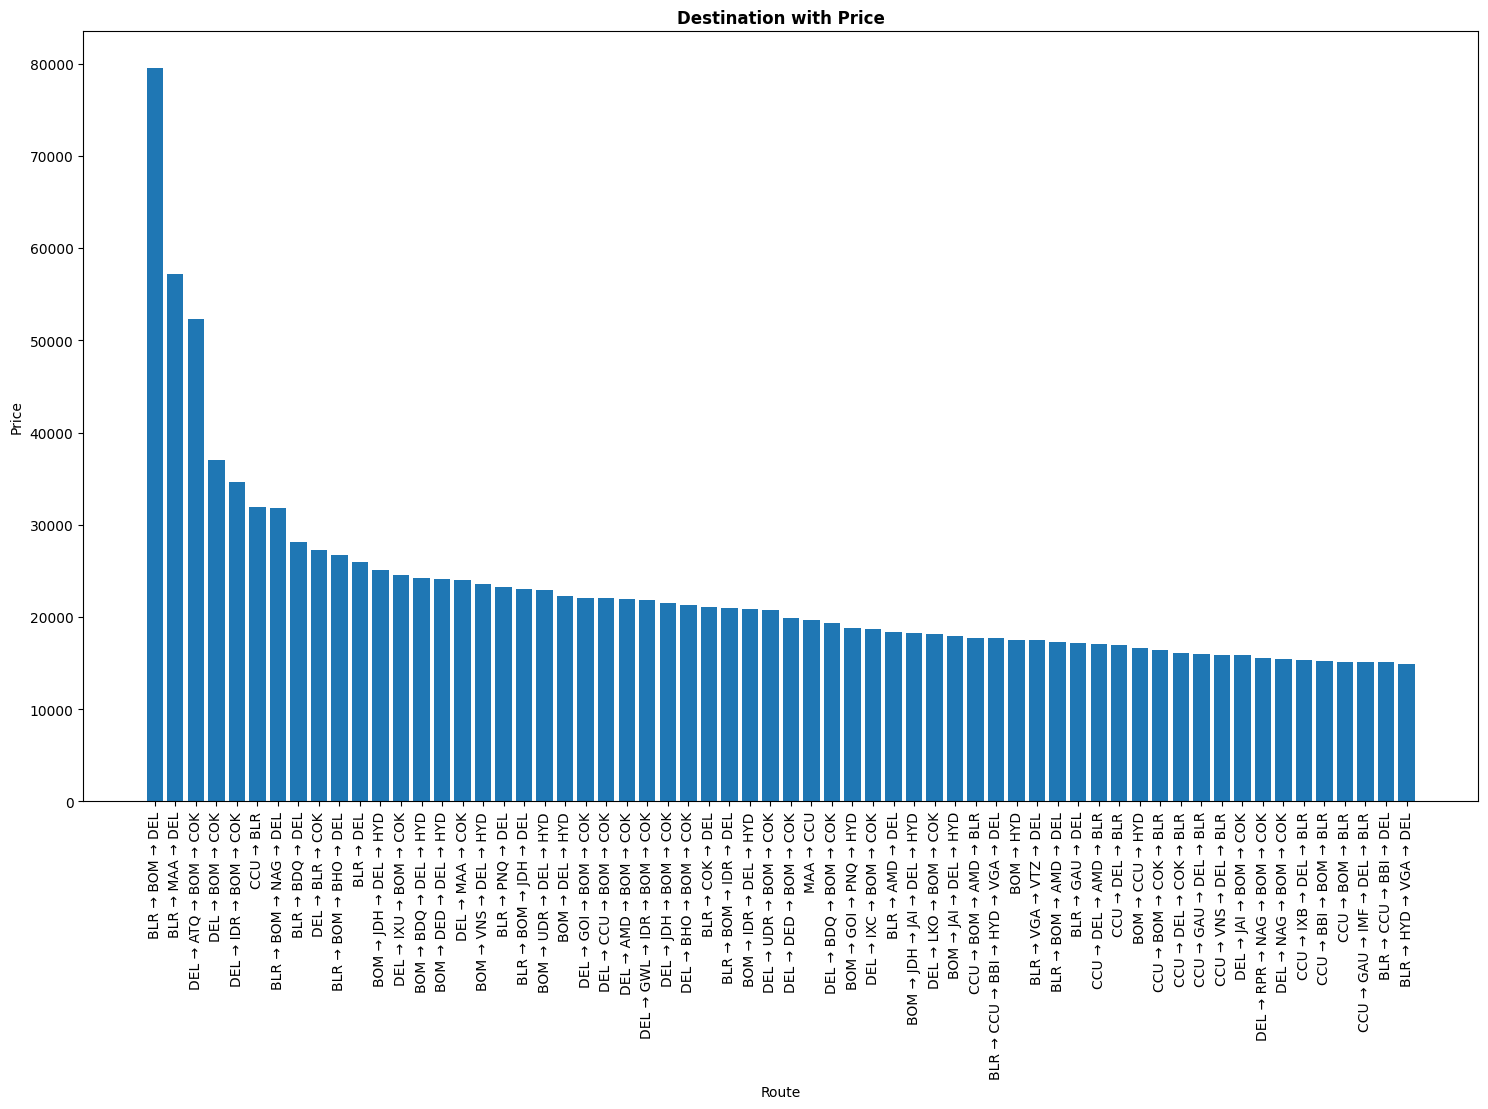

In [28]:
# Most priced routes
top_1000 = df1.sort_values("Price", ascending=False).head(1000)

plt.figure(figsize=(18, 10))
plt.bar(top_1000["Route"], top_1000["Price"])

plt.title("Destination with Price", fontweight="bold")
plt.xlabel("Route")
plt.ylabel("Price")

plt.xticks(rotation=90)

plt.show()

In [29]:
# ---

In [30]:
# ## Feature Engineering

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [32]:
df1["Date_of_Journey"].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [33]:
# Create three features from "Date_of_Journey" and drop it
df1["Date"] = df1["Date_of_Journey"].str.split("/").str[0]
df1["Month"] = df1["Date_of_Journey"].str.split("/").str[1]
df1["Year"] = df1["Date_of_Journey"].str.split("/").str[2]

df1.drop("Date_of_Journey", inplace=True, axis=1)

df1["Date"] = df1["Date"].astype(int)
df1["Month"] = df1["Month"].astype(int)
df1["Year"] = df1["Year"].astype(int)

In [34]:
# Handle "Total_Stops"
df1["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [35]:
df1["Total_Stops"].replace(np.nan, "1 stop", inplace=True)
df1["Stops"] = df1["Total_Stops"].replace("non-stop", "1 stop")
df1["Stops"] = df1["Stops"].str.split(" ").str[0]
df1["Stops"] = df1["Stops"].astype(int)
df1.drop("Total_Stops", axis=1, inplace=True)

In [36]:
df1.head(4)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,No info,3897,24,3,2019,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,No info,13882,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218,12,5,2019,1


In [37]:
df1["Arrival_Time"].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], shape=(1343,), dtype=object)

In [38]:
# Remove date from "Arrival_Time"
df1["Arrival_Time"] = df1["Arrival_Time"].str.split(" ").str[0]

In [39]:
# Create "Arrival_hour" and "Arrival_min"
df1["Arrival_hour"] = df1["Arrival_Time"].str.split(":").str[0]
df1["Arrival_min"] = df1["Arrival_Time"].str.split(":").str[1]
df1.drop("Arrival_Time", axis=1, inplace=True)

In [40]:
df1["Arrival_hour"] = df1["Arrival_hour"].astype(int)
df1["Arrival_min"] = df1["Arrival_min"].astype(int)

In [41]:
df1.head(4)

,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Date,Month,Year,Stops,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897,24,3,2019,1,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662,1,5,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882,9,6,2019,2,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218,12,5,2019,1,23,30


In [42]:
df1["Dep_Time"].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [43]:
# Create "Dep_hour" and "Dep_min"
df1["Dep_hour"] = df1["Dep_Time"].str.split(":").str[0]
df1["Dep_min"] = df1["Dep_Time"].str.split(":").str[1]
df1.drop("Dep_Time", axis=1, inplace=True)
df1["Dep_hour"] = df1["Dep_hour"].astype(int)
df1["Dep_min"] = df1["Dep_min"].astype(int)

In [44]:
df1.head(4)

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stops,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897,24,3,2019,1,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218,12,5,2019,1,23,30,18,5


In [45]:
df1["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [46]:
df1["Additional_Info"] = df1["Additional_Info"].replace("No Info", "No info")

In [47]:
print(df1.columns)

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year', 'Stops',
       'Arrival_hour', 'Arrival_min', 'Dep_hour', 'Dep_min'],
      dtype='object')


In [48]:
df1["Duration"].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [49]:
# Create "Duration_hour" and "Duration_min"
df1["Duration_hour"] = df1["Duration"].str.split(" ").str[0]
df1["Duration_hour"] = df1["Duration_hour"].str.split("h").str[0]

df1["Duration_min"] = df1["Duration"].str.split(" ").str[1]
df1["Duration_min"] = df1["Duration_min"].str.split("m").str[0]

df1.drop("Duration", axis=1, inplace=True)

In [50]:
df1["Duration_min"].unique()

array(['50', '25', nan, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [51]:
df1["Duration_hour"].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [52]:
df1["Duration_min"] = df1["Duration_min"].replace(np.nan, "0")
df1["Duration_hour"] = df1["Duration_hour"].replace("5m", "5")

# Convert to int
df1["Duration_min"] = df1["Duration_min"].astype(int)
df1["Duration_hour"] = df1["Duration_hour"].astype(int)

In [53]:
df1["Route"].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [54]:
# Split "Route" into multiple columns
df1["Route_1"] = df1["Route"].str.split(" → ").str[0]
df1["Route_2"] = df1["Route"].str.split(" → ").str[1]
df1["Route_3"] = df1["Route"].str.split(" → ").str[2]
df1["Route_4"] = df1["Route"].str.split(" → ").str[3]
df1["Route_5"] = df1["Route"].str.split(" → ").str[4]

df1["Route_1"].fillna("None", inplace=True)
df1["Route_2"].fillna("None", inplace=True)
df1["Route_3"].fillna("None", inplace=True)
df1["Route_4"].fillna("None", inplace=True)
df1["Route_5"].fillna("None", inplace=True)

df1.drop("Route", axis=1, inplace=True)

In [55]:
df1.head(5)

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stops,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897,24,3,2019,1,1,10,22,20,2,50,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662,1,5,2019,2,13,15,5,50,7,25,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882,9,6,2019,2,4,25,9,25,19,0,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218,12,5,2019,1,23,30,18,5,5,25,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302,1,3,2019,1,21,35,16,50,4,45,BLR,NAG,DEL,None,None


In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Additional_Info  10683 non-null  object
 4   Price            10683 non-null  int64 
 5   Date             10683 non-null  int64 
 6   Month            10683 non-null  int64 
 7   Year             10683 non-null  int64 
 8   Stops            10683 non-null  int64 
 9   Arrival_hour     10683 non-null  int64 
 10  Arrival_min      10683 non-null  int64 
 11  Dep_hour         10683 non-null  int64 
 12  Dep_min          10683 non-null  int64 
 13  Duration_hour    10683 non-null  int64 
 14  Duration_min     10683 non-null  int64 
 15  Route_1          10683 non-null  object
 16  Route_2          10683 non-null  object
 17  Route_3          10683 non-null

In [57]:
df1.isnull().sum()

Airline            0
Source             0
Destination        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Stops              0
Arrival_hour       0
Arrival_min        0
Dep_hour           0
Dep_min            0
Duration_hour      0
Duration_min       0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [58]:
# No Null value in dataset

In [59]:
df1.head(5)

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stops,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897,24,3,2019,1,1,10,22,20,2,50,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662,1,5,2019,2,13,15,5,50,7,25,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882,9,6,2019,2,4,25,9,25,19,0,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218,12,5,2019,1,23,30,18,5,5,25,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302,1,3,2019,1,21,35,16,50,4,45,BLR,NAG,DEL,None,None


In [60]:
# Remove Year column because this data is from the same year

In [61]:
df1.drop("Year", axis=1, inplace=True)

In [62]:
# ---

In [63]:
# ### Model Training

In [4]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("data/train.csv")


df = df.drop(columns=["Route"], errors="ignore") 


x = df.drop("Price", axis=1)
y = df["Price"]


encoders = {}


for col in x.columns:
    if x[col].dtype == "object":  
        encoder = LabelEncoder()
        x[col] = encoder.fit_transform(x[col])
        encoders[col] = encoder 


joblib.dump(encoders, "models/encoders.pkl")

print("Encoders saved successfully (Route excluded)!")


Encoders saved successfully (Route excluded)!


In [66]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Save test data
joblib.dump(x_test, "models/x_test.pkl")
joblib.dump(y_test, "models/y_test.pkl")

['models/y_test.pkl']

In [67]:
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (7478, 18)
Shape of x_test: (3205, 18)
Shape of y_train: (7478,)
Shape of y_test: (3205,)


In [68]:
# ---

In [69]:
# ### Lasso for Feature Importance

In [70]:
model_Lasso = SelectFromModel(Lasso(alpha=0.005, max_iter=500, random_state=0))
model_Lasso.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, max_iter=500, random_state=0))

In [71]:
model_Lasso.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [72]:
x_train.columns[(model_Lasso.get_support())]

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Stops', 'Arrival_hour', 'Arrival_min', 'Dep_hour', 'Dep_min',
       'Duration_hour', 'Duration_min', 'Route_1', 'Route_2', 'Route_3',
       'Route_4', 'Route_5'],
      dtype='object')

In [73]:
# These are the selected features

In [74]:
etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)

ExtraTreesRegressor()

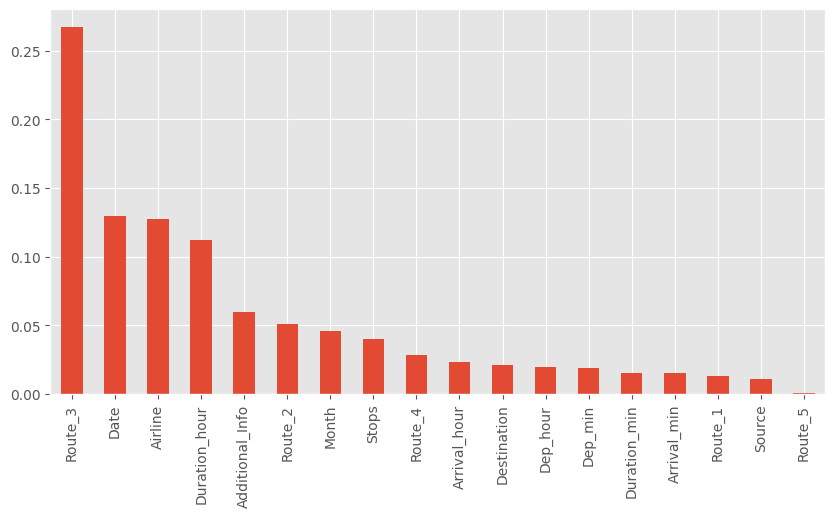

In [75]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))

feature_imp = pd.Series(etr.feature_importances_, index=x.columns)
feature_imp.nlargest(35).plot(kind="bar")

plt.show()

In [76]:
# ### Decision Tree

In [77]:
model_DT = DecisionTreeRegressor()
model_DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [78]:
predict_DT = model_DT.predict(x_test)

In [79]:
scoreDT = r2_score(predict_DT, y_test)
scoreDT

0.8069210146345159

In [80]:
print("MSE -->> ", mean_squared_error(predict_DT, y_test))
print("MAE -->> ", mean_absolute_error(predict_DT, y_test))
print("RMSE -->> ", np.sqrt(mean_squared_error(predict_DT, y_test)))

MSE -->>  3784811.916926677
MAE -->>  710.7904836193447
RMSE -->>  1945.4593074455906


In [81]:
# ### SVR

In [82]:
from sklearn.svm import SVC

In [83]:
svc_model = SVC()
svc_model.fit(x_train, y_train)

SVC()

In [84]:
pred_svc = svc_model.predict(x_test)

In [85]:
print("MSE ", mean_squared_error(pred_svc, y_test))
print("MAE ", mean_absolute_error(pred_svc, y_test))
print("RMSE ", np.sqrt(mean_absolute_error(pred_svc, y_test)))

MSE  13575112.624336973
MAE  2371.75631825273
RMSE  48.70068088079191


In [86]:
r2_score(pred_svc, y_test)

-0.14109035701982964

In [87]:
# ### GradientBoostingRegressor

In [88]:
from sklearn.ensemble import GradientBoostingRegressor

In [89]:
gbr_model = GradientBoostingRegressor()
gbr_model.fit(x_train, y_train)

GradientBoostingRegressor()

In [90]:
gbr_pred = gbr_model.predict(x_test)

In [91]:
print("MSE ", mean_squared_error(gbr_pred, y_test))
print("MAE ", mean_absolute_error(gbr_pred, y_test))
print("RMSE ", np.sqrt(mean_absolute_error(gbr_pred, y_test)))

MSE  3250794.4389112876
MAE  1229.590127274006
RMSE  35.06551193514799


In [92]:
r2_score(gbr_pred, y_test)

0.7999579935342798

In [93]:
# ### Model Evaluation

In [94]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return r2, mae, mse, rmse

In [95]:
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "SVR": SVR()
}

In [96]:
results = {}
for name, model in models.items():
    r2, mae, mse, rmse = evaluate_model(model, x_train, y_train, x_test, y_test)
    results[name] = {"R2": r2, "MAE": mae, "MSE": mse, "RMSE": rmse}

results_df = pd.DataFrame.from_dict(results, orient='index')
print(results_df)

                        R2          MAE           MSE         RMSE
RandomForest      0.874955   652.279096  2.525722e+06  1589.251981
GradientBoosting  0.840277  1228.572520  3.226163e+06  1796.152395
DecisionTree      0.803074   721.579095  3.977596e+06  1994.391231
SVR               0.028382  3460.364366  1.962515e+07  4430.028573


In [97]:
# Save the best model
best_model_name = max(results, key=lambda name: results[name]["R2"])
best_model = models[best_model_name]

best_model.fit(x_train, y_train)
joblib.dump(best_model, "models/best_model.pkl")
print(f"The best model is {best_model_name} and it has been saved as 'best_model.pkl'")

The best model is RandomForest and it has been saved as 'best_model.pkl'
